<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:**Nick Lamkey

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



# Workflow to process Landsat NDVI across multiple months and sites

## Process one scene 
* Get all the Landsat data for a scene organized and ready to process 
* Get a list of GeoTiff files in the directory for a scene 
* Sort the list so that bands are in order for all operating systems
* Select a scene from that last
  * Get bands 4 and 5 (red and NIR)
  * Get pixel QA bands
* Write loop that uses open_clean_bands functions
* Use the mask_crop_ndvi function
* Calculate the mean ndvi

## Process multiple scenes for one site
Steps required to process all Landsat data
* Get list of all directories for the Landsat scenes for the site
* For each directory use the steps above for one scene to calculate NDVI for the data in that directory
* Loop through that list
  * Get bands 4 and 5 (red and NIR)
  * Get pixel QA bands
* Write loop that uses open_clean_bands functions
   * Store bands in a list
   * Use that list for the mask_crop_ndvi function
   * Store NDVI in a list 
   * Calculate mean NDVI
* Grab the date associated with each NDVI calculation 
* Grab site name for each scene
* Save NDVI values of the data for that directory to a list or dataframe that contains average NDVI for each scene at each site

## Process multiple scenes at multiple sites
* Get list of all directories associated with each site name
* Write a loop that iterates through multiple site folders
* Use workflow from processing multiple scenes to iterate through each file within above loop 
* Capture results: Mean NDVI, date, site name to a list or dataframe 
* Export dataframe with above values to a csv

## Create the plot

## Things to keep in mind for efficient code
* Don't modify the raw data; create an outputs directory
* Create functions; 1-3 inputs and 1-2 outputs; consider wrapping function that combines multiple functions
* Add checks and tests
  * correct types
  * assumptions of code
  * Identify points of failure

  

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

import os
from glob import glob
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pyproj

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Apply pyproj to speed up processing
pyproj.set_use_global_context(True)

# Get data and set the working directory
data = et.data.get_data('ndvi-automation')
working_dir = os.path.join(et.io.HOME,
                           "earth-analytics",
                           "data")
if os.path.exists(working_dir):
    print("Path exists. Working directory set")
    os.chdir(working_dir)
else:
    print("Path does not exist. Creating and setting working directory")
    os.mkdir(working_dir)
    os.chdir(working_dir)

# Create outputs directory
output_dir = os.path.join(working_dir,"ndvi-automation","outputs")
if os.path.exists(output_dir):
    print("Output directory exists")
else:
    print("Output directory does not exist, creating directory")
    os.mkdir(os.path.join(working_dir, "ndvi-automation", "outputs"))

Path exists. Working directory set
Output directory exists


In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!
def open_clean_bands(band_path,
                     crop_extent,
                     valid_range=None):
    """Open and mask a single landsat band using a pixel_qa layer.

    Parameters
    -----------
    band_path : string
        A path to the array to be opened
    crop_extent : GeoDataFrame
        A shapefile of AOI extents
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None


    Returns
    -----------
    arr : xarray DataArray
        An xarray DataArray with values that should be masked set to 1 for True (Boolean) 
        and crop to spatial extent
    """
    # TODO add tests to ensure the arrays are the same .shape
    band = rxr.open_rasterio(band_path, masked=True).rio.clip(crop_extent.geometry,
                                                              from_disk=True).squeeze()

    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band


def mask_crop_ndvi(all_bands,
                   crop_bound,
                   pixel_qa_path,
                   vals):
    """Open and mask a single landsat band using a pixel_qa layer.

    Parameters
    -----------
    all_bands : list
        A list containing two xarray objects for landsat bands 4 and  5
    crop_bound: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rasterio mask().
    pixel_qa_path: string
        A path to a pixel qa tif file.
    vals: list
        A list of values needed to create the cloud mask


    Returns
    -----------
    ndvi_crop : Xarray Dataset
        a cropped and masked xarray object containing NDVI values
    """

    crop_json = crop_bound.geometry

    # Open and clip qa layer
    pixel_qa = rxr.open_rasterio(pixel_qa_path, masked=True).rio.clip(crop_json,
                                                                      from_disk=True).squeeze()

    # Calculate NDVI
    ndvi_xr = (all_bands[1]-all_bands[0]) / (all_bands[1]+all_bands[0])

    # Apply cloud mask to NDVI
    ndvi_mask = ndvi_xr.where(~pixel_qa.isin(vals))

    return ndvi_mask

## Processing multiple scenes from one site
### Where did the data come from?
* The Landsat data originally comes from the USGS Landsat 8. Landsat data can be downloaded via earthexplorer. The data for this workflow can be downloaded using earthpy: data = et.data.get_data('ndvi-automation'). Scenes from Jan 2017 to December 2017 were analyzed for the Harvard forest (HARV) in the Eastern United States.
* The numbers for vals, used to masked clouds from the scenes, are the USGS website:https://www.usgs.gov/media/files/landsat-8-collection-1-land-surface-reflectance-code-product-guide

### What's the workflow?
* Below a loop was written to process multiple landsat scenes for one site. A master for loop utilizes two functions that process the data so that mean NDVI can be calculated for each scene. The first function opens the data, crops it to the site extents and filters for a range of values that eliminate negative values. The second for loop uses the pixel_qa layer that comes with Landsat imagery to mask clouds that may be present in any scenes. This is to ensure the reflectance values from the clouds are not included in the final calculation. The function crops the pixel_qa layer, masks each band and calculates the NDVI. Within the master for loop, site name, dates associated with each site and mean NDVI are captured into lists and then added to a dataframe. 

### How was the code optimized?
* The xarrays being worked on in the for loop were stored in a list within the for loop so that only two bands were stored in the list per iteration. This made it easy to run the mask_crop_ndvi function on both bands while keeping the data in order. Pyproj was used to speed up processing times.  

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# Paths to data
path_to_harv = os.path.join("ndvi-automation", "sites", "HARV")
harv_extent = os.path.join(path_to_harv, "vector", "HARV-crop.shp")
harv_landsat = os.path.join(path_to_harv, "landsat-crop")

# Get the site name
site_name = os.path.basename(path_to_harv)

# Open site boundaries
harv_bound = gpd.read_file(harv_extent)

# Get list of Landsat directories for Harv
harv_dirs = sorted(glob(os.path.join(harv_landsat, "LC08*")))

# Values of clouds from USGS Landsat product guide
# https://www.usgs.gov/media/files/landsat-8-collection-1-land-surface-reflectance-code-product-guide
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

ndvi_list = []
date_list = []
site_list = []
for i in harv_dirs:
    band_paths = sorted(glob(os.path.join(i, "*band*[4-5].tif")))
    pixel_qa_path = sorted(glob(os.path.join(i, "*qa*")))

    mean_ndvi_df = pd.DataFrame()
    basenames = os.path.basename(i)
    dates = basenames[10:18]
    date_list.append(dates)
    out_xr = []
    for band, tif_path in enumerate(band_paths):

        out_xr.append(open_clean_bands(band_path=tif_path,
                                       crop_extent=harv_bound,
                                       valid_range=(0, 10000)))

        out_xr[band]["band"] = band+1

    xr.concat(out_xr, dim="band")

    for k in pixel_qa_path:
        ndvi = mask_crop_ndvi(all_bands=out_xr,
                              crop_bound=harv_bound,
                              pixel_qa_path=k,
                              vals=vals)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean_ndvi = np.nanmean(ndvi)
        ndvi_list.append(mean_ndvi)

        site_list.append(site_name)
        mean_ndvi_df["date"] = date_list
        mean_ndvi_df["site"] = site_list
        mean_ndvi_df['mean_ndvi'] = ndvi_list
mean_ndvi_df.dropna(inplace=True)
mean_ndvi_df["date"] = pd.to_datetime(mean_ndvi_df["date"])
mean_ndvi_df.set_index("date", inplace=True)
mean_ndvi_df

,site,mean_ndvi
date,,
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251133
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310
2017-06-21,HARV,0.881739
2017-07-23,HARV,0.819768
2017-08-24,HARV,0.864464
2017-09-09,HARV,0.857701


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

# Processing multiple scenes from multiple sites 

### What's the workflow?
* Below the same process used above is also used here in the to process multiple sites. The master for loop iterates through two folders. As the master loop iterates a landsat_dir list is generated for a site which is processed in the subsequent for loops the same way as above but now the master for loop will go through both directories containing each site. As long as the landsat imagery is stored in a folder labeled sites with vector layers are named with site_name + -crop.shp, this loop will iterate through any number of sites and scenes. 

### How was the code optimized?
* The loop structure of this code keeps track of each scene so that only the bands from one scene are being worked on through each iteration. Only the date, site names and the final ndvi values are stored outside the loop. The two functions also eliminate variables being stored in memory. Pyproj was used to speed up processing times. 

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# Path to data
path_to_data = os.path.join("ndvi-automation", "sites")

# Get list of both site directories
site_dirs = glob(path_to_data + "/*/")

# Values of clouds from USGS Landsat product guide
# https://www.usgs.gov/media/files/landsat-8-collection-1-land-surface-reflectance-code-product-guide
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

# Create loop variables
date_list = []
site_list = []
ndvi_list = []
for i in site_dirs:
    # Get site names from file path
    site_names = os.path.basename(os.path.normpath(i))
    # Set up paths to data in both folders
    crop_paths = os.path.join(i, "vector")
    site_crop_paths = os.path.join(crop_paths, site_names + "-crop.shp")
    crop_bounds = gpd.read_file(site_crop_paths)
    landsat_dir = os.path.join(i, "landsat-crop")
    landsat_dirs = sorted(glob(os.path.join(landsat_dir, "LC08*")))
    # Loop through each directory
    for k in landsat_dirs:

        # Create dataframe to store data and grab dates and site names
        mean_ndvi_df = pd.DataFrame()
        basenames = os.path.basename(k)
        dates = basenames[10:18]
        date_list.append(dates)
        site_list.append(site_names)
        mean_ndvi_df["date"] = date_list
        mean_ndvi_df["site"] = site_list

        # Store clean xarrays for masking
        out_xr = []

        band_paths = sorted(glob(os.path.join(k, "*band*[4-5].tif")))

        pixel_qa_path = sorted(glob(os.path.join(k, "*qa*")))

        # Open and clean xarrays
        for band, tif_path in enumerate(band_paths):

            out_xr.append(open_clean_bands(band_path=tif_path,
                                           crop_extent=crop_bounds,
                                           valid_range=(0, 10000)))

            out_xr[band]["band"] = band+1

        xr.concat(out_xr, dim="band")

        # Remove clouds and calc NDVI
        for c in pixel_qa_path:

            ndvi = mask_crop_ndvi(all_bands=out_xr,
                                  crop_bound=crop_bounds,
                                  pixel_qa_path=c,
                                  vals=vals)
        # Remove warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)

            # Calculate and store mean NDVI
            mean_ndvi = np.nanmean(ndvi)
            ndvi_list.append(mean_ndvi)
        mean_ndvi_df['mean_ndvi'] = ndvi_list
#     mean_ndvi_df.dropna(inplace=True)
        mean_ndvi_df["date"] = pd.to_datetime(mean_ndvi_df["date"])
        mean_ndvi_df.set_index("date", inplace=True)
mean_ndvi_df

,site,mean_ndvi
date,,
2017-01-12,HARV,NaN
2017-01-28,HARV,NaN
2017-02-13,HARV,NaN
2017-03-01,HARV,NaN
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251133
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:05.663977.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

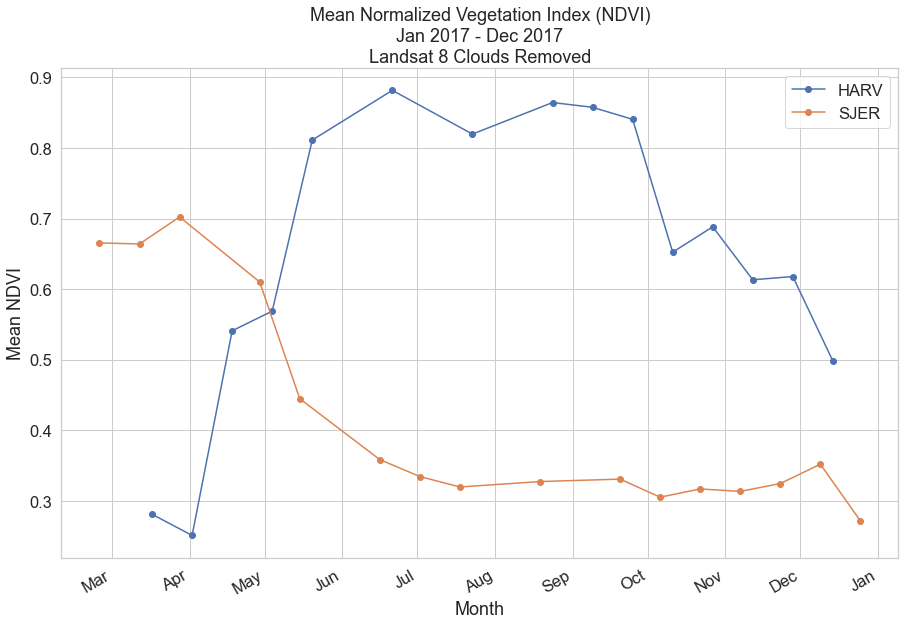

In [10]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# Drop na values and reset_index()
mean_ndvi_df.dropna(inplace=True)
plot_df = mean_ndvi_df.reset_index()

# Create plot space
f, ax = plt.subplots(figsize=(15, 10))

for i, k in plot_df.groupby("site"):
    k.groupby("site").plot(x='date',
                           y='mean_ndvi',
                           ax=ax,
                           label=i,
                           style='-o')
ax.set(xlabel="Month",
       ylabel="Mean NDVI",
       title="Mean Normalized Vegetation Index (NDVI)\nJan 2017 - Dec 2017\nLandsat 8 Clouds Removed",
       )
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests

In [12]:
# Ignore this cell for the autograding tests

# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

At the SJER site I'd recommend flying between March and April when NDVI is highest for this site. I would recommend flying in the HARV site during Mid June where NDVI is highest but the following months through October would also be adequate. 

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

Instead of calculating mean NDVI the final outputs could be a series of plots showing the NDVI at each site. I would use the master for loop the same way but store each NDVI calculation as a xarray dataarray and write a loop that plots each xarray in a sequence. Then a visual comparison could be made between each site. 

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

# BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [13]:
output_file = os.path.join(output_dir, "mean_ndvi_df.csv")
mean_ndvi_df.to_csv(output_file)